# Unveiling the Churn Patterns in Digital Service Provision

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Exploratory Analysis

DATA: Data file used is "telco-customer-churn-csv"

In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# use for heading after everything confirmation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# statistical summary of numerical columns , categorical variables big problem will convert to dummy variable

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# no nan or cells or values

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Display the balance of the class labels (Churn) with a Count Plot.

In [ ]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

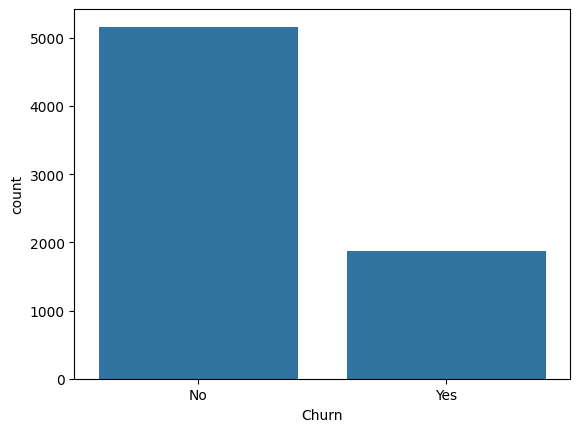

In [ ]:
sns.countplot(data=df , x="Churn")

Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

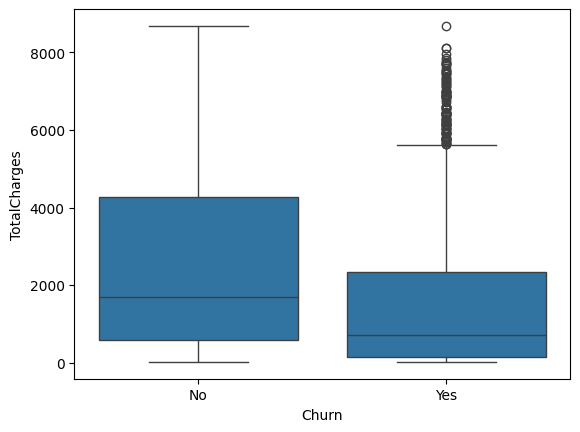

In [ ]:
sns.boxplot(data=df, x='Churn',y='TotalCharges')

Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.

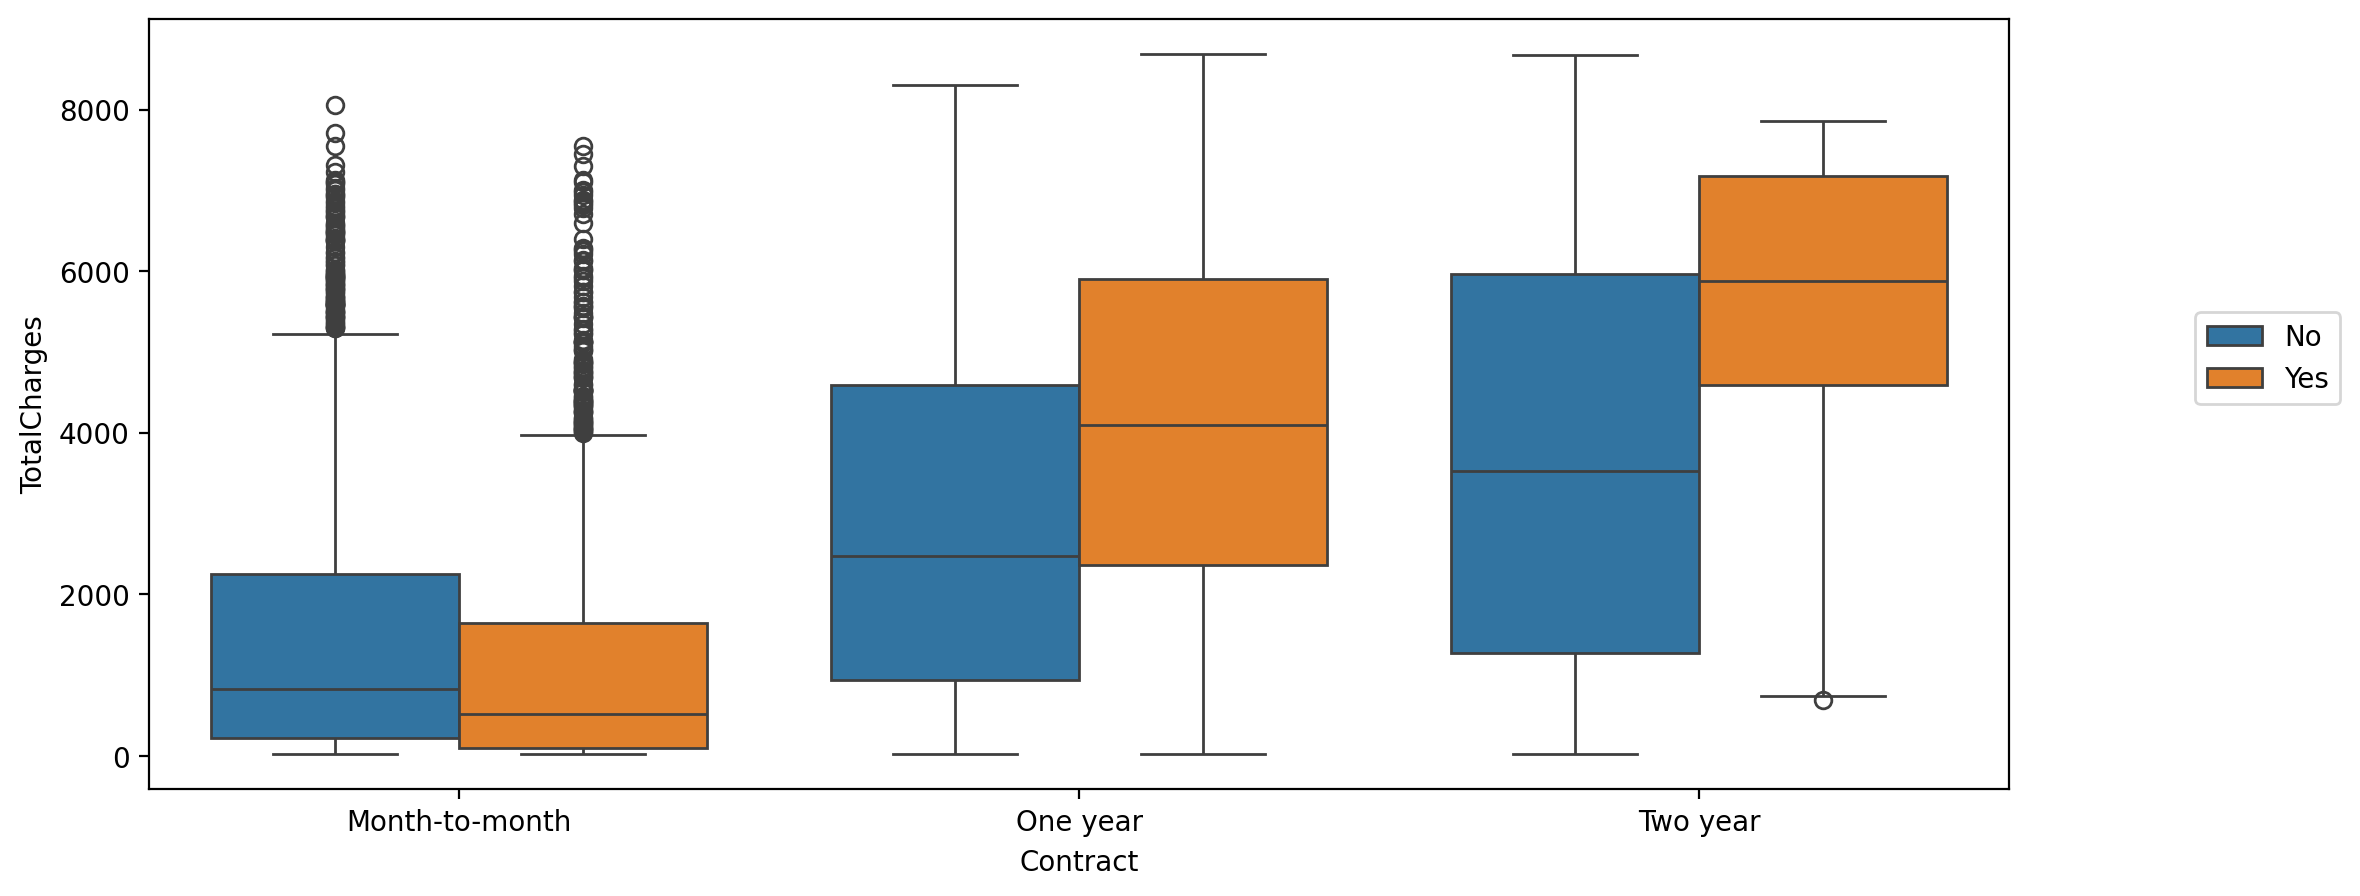

In [ ]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(data=df , y='TotalCharges' , x='Contract' , hue='Churn')
plt.legend(loc=(1.1,0.5))

General Overview : Distribution of Yes and No is quite similar in month to month, whereas the longer you stayon we see that Companies get more charges from those who have churned which is interesting.

General Consensus: More customer churn over large contracts because of High totalcharges.

Our Recommendation to the company: Might give a Staying On bonus to the customers to make them not churn.

#### categorical variable to dummy variable

In [ ]:
pd.get_dummies(df[ ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,True,False,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,False,True,True,False,True,False,False,True,True,...,True,False,True,False,False,False,False,True,True,False
2,0,False,True,True,False,True,False,False,True,True,...,False,False,False,True,False,False,False,True,False,True
3,0,False,True,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,True,False,True,False,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,False,True,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,True,True,False
7028,0,True,False,False,True,False,True,False,True,False,...,True,False,False,True,False,True,False,False,True,False
7029,0,True,False,False,True,False,True,True,False,False,...,False,False,False,True,False,False,True,False,True,False
7030,1,False,True,False,True,True,False,False,True,False,...,False,False,False,True,False,False,False,True,False,True


In [ ]:
corr_df=pd.get_dummies(df[ ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [ ]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

Like seen above, Churn_Yes has a direct negative 100% correlation to Churn_No.

In [ ]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

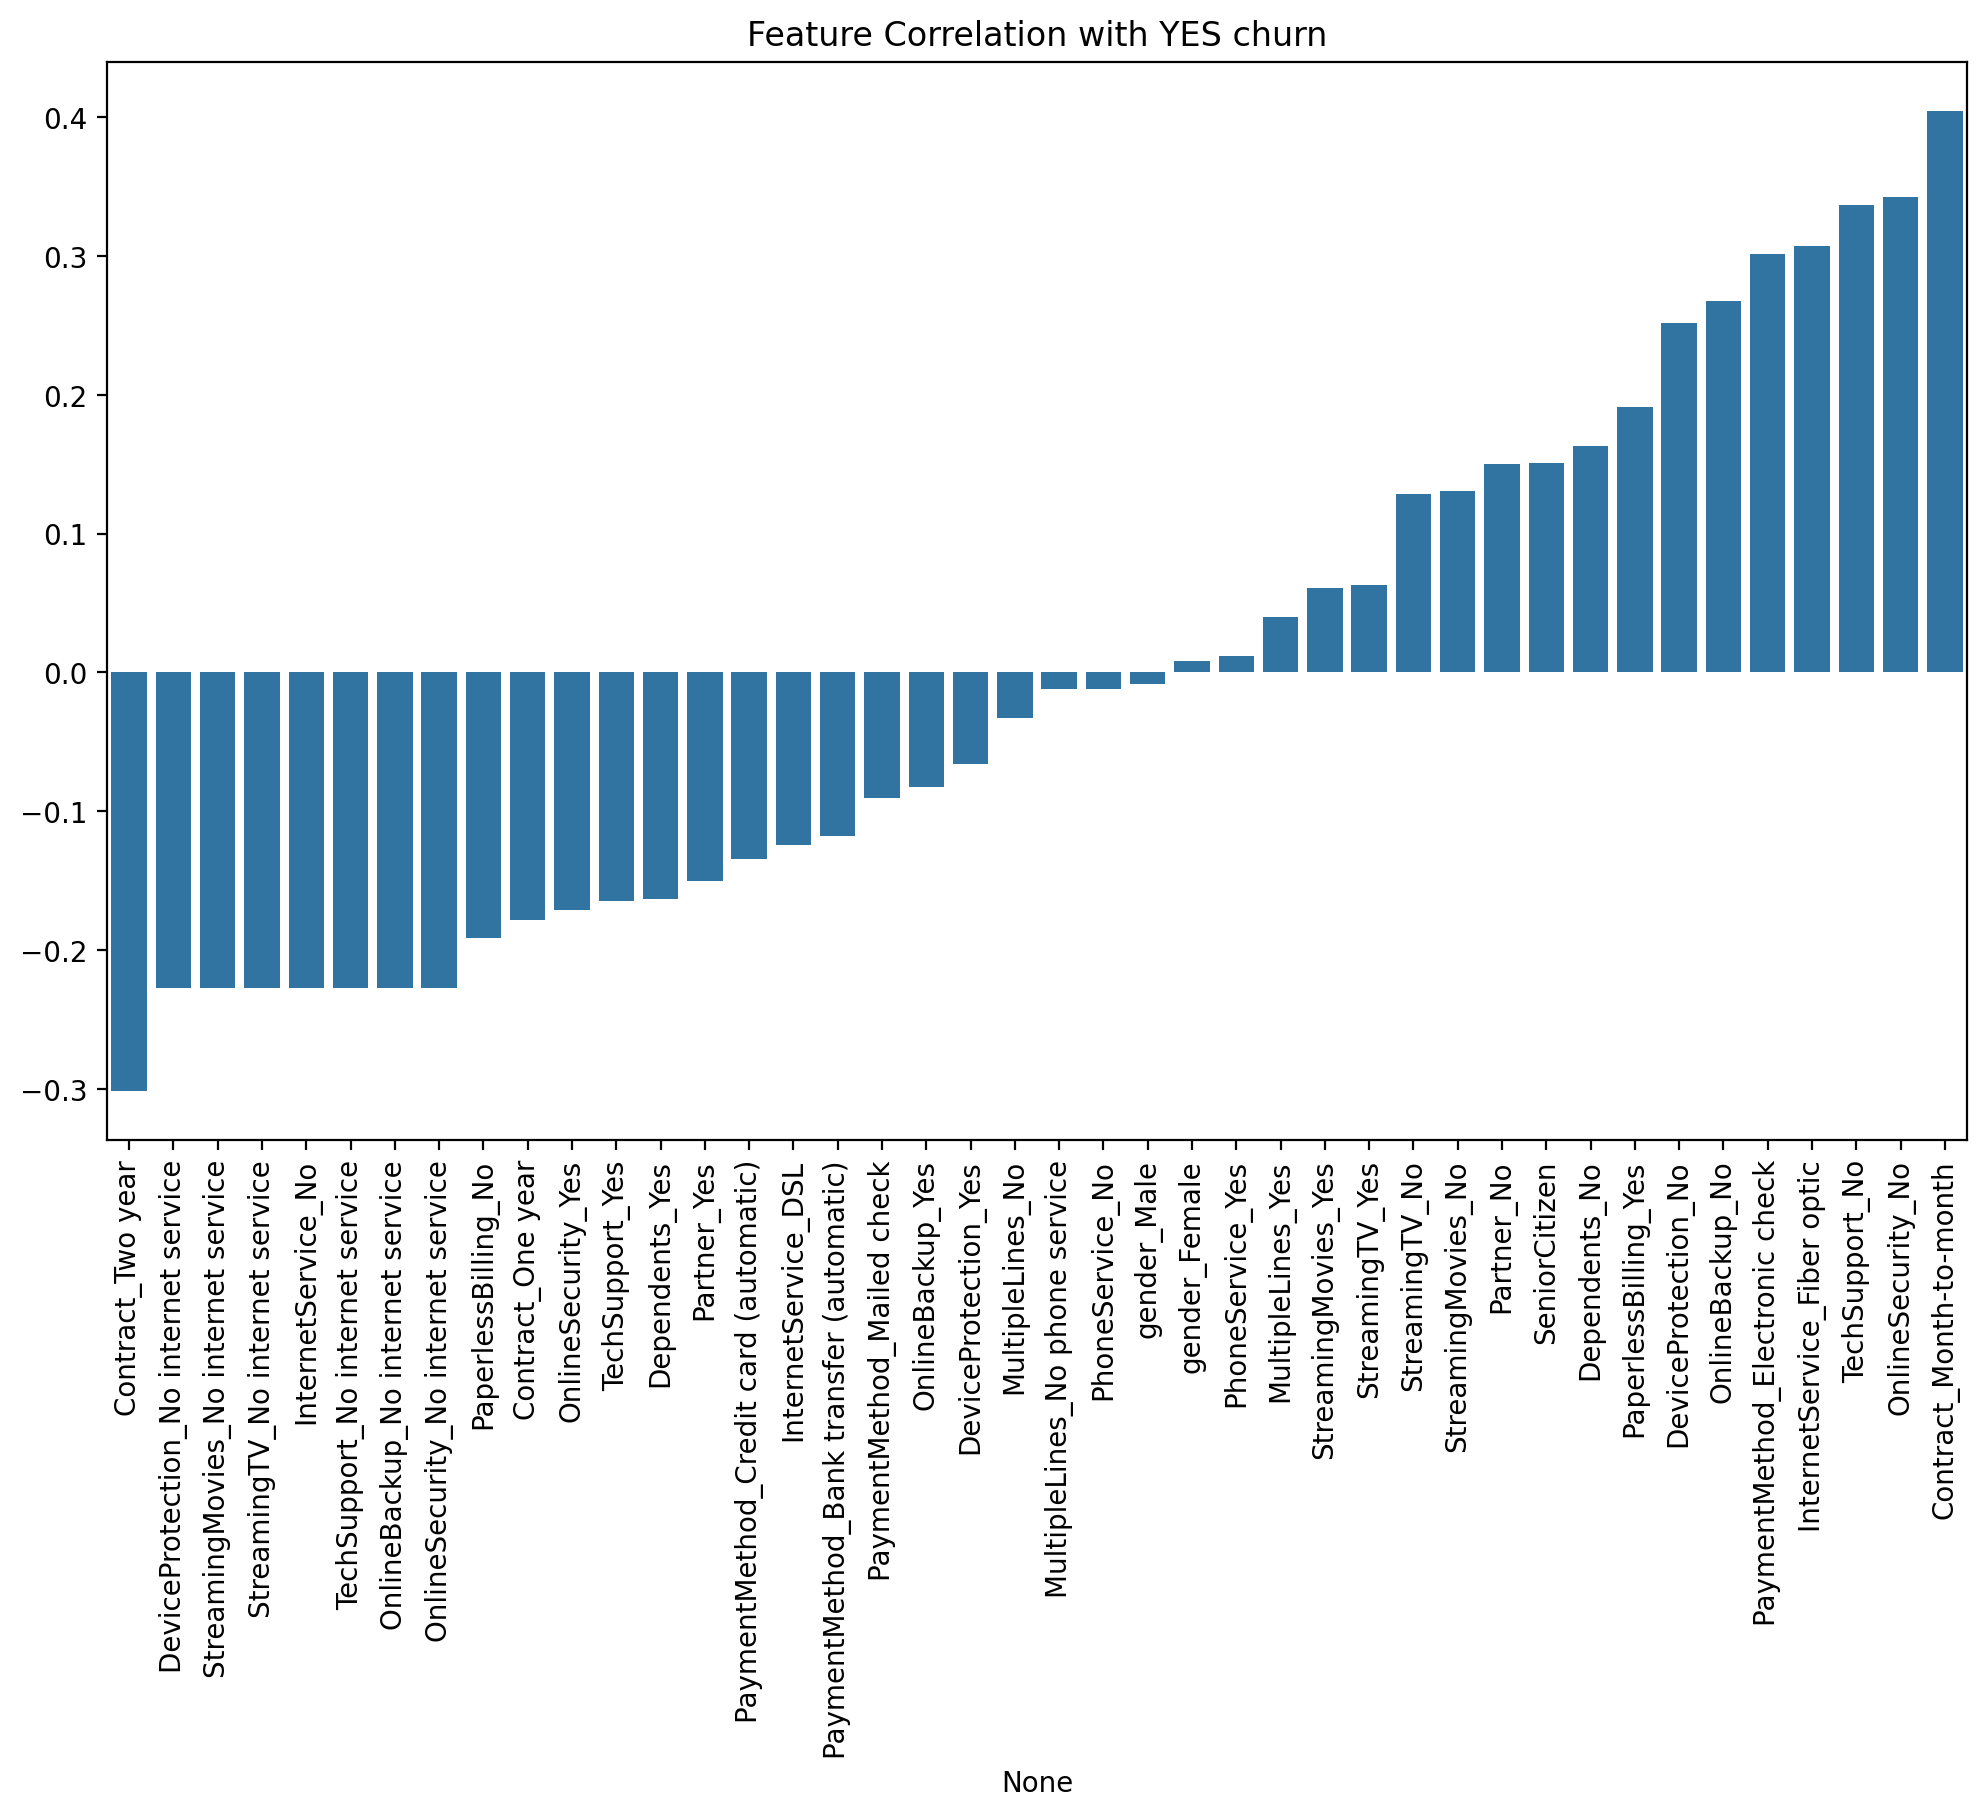

In [ ]:
plt.figure(figsize=(12,7), dpi=200)
plt.title("Feature Correlation with YES churn")
sns.barplot(x=corr_yes_churn.index , y = corr_yes_churn.values)
plt.xticks(rotation=90);

General Overview: Contract_Month-to-Month is having direct coorelation with Churn_Yes(likely to end their service after one month) , as a customer signing up for one month, eventually may end their service. This is completely opposite to Contract_Two year which can be seen from the above barplot.

## Churn Analysis  

### segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Customers having three type of Contract

In [ ]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

Customers having different tenure months

<Axes: xlabel='tenure', ylabel='Count'>

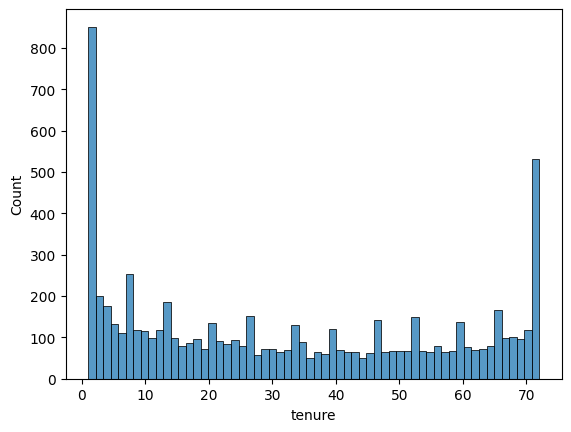

In [ ]:
sns.histplot(data=df, x='tenure', bins=60)

General Overview: Like seen in the above histogram , majority of customers are opting for 1-2 month tenure.

Our Recommendation to Company: These customers could either be leveraged into choosing more months in their tenure by having discount coupouns or these customers can be left for one month only as sometimes they come with the intention for using the service for one month only regardless of the discount coupons.

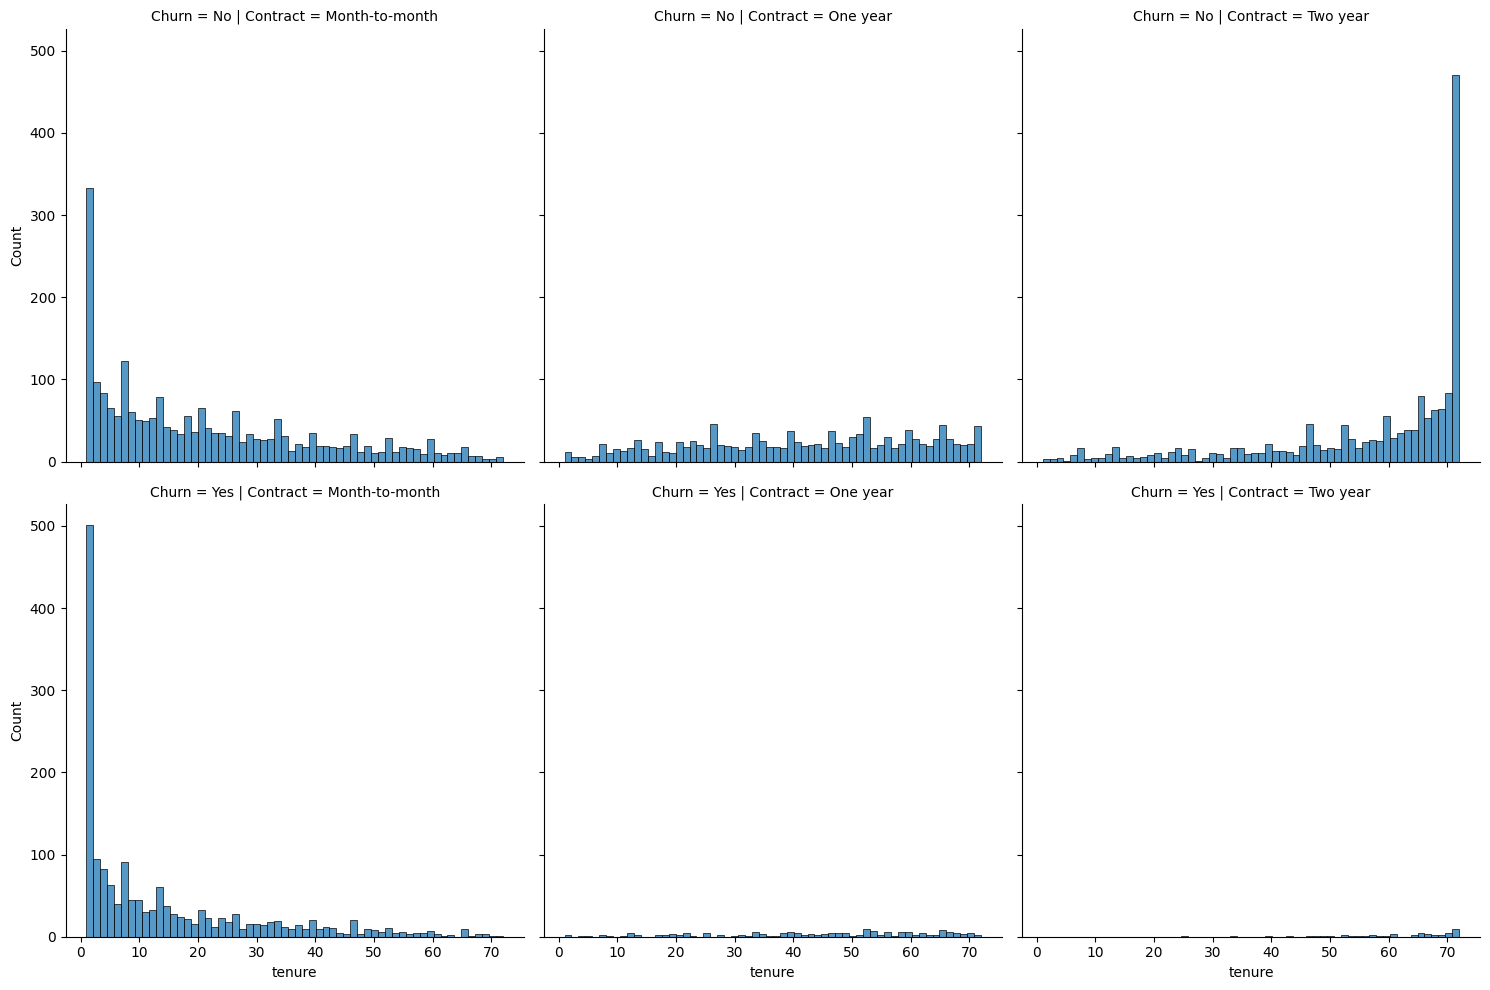

In [ ]:
sns.displot(data=df , x='tenure', bins = 60 , col='Contract' , row = 'Churn')

General Overview: No need to worry about One Year or Two Year Contracts, but for
    
   left . have to write

Scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.

Text(0.5, 1.0, 'Total Charges versus Monthly Charges')

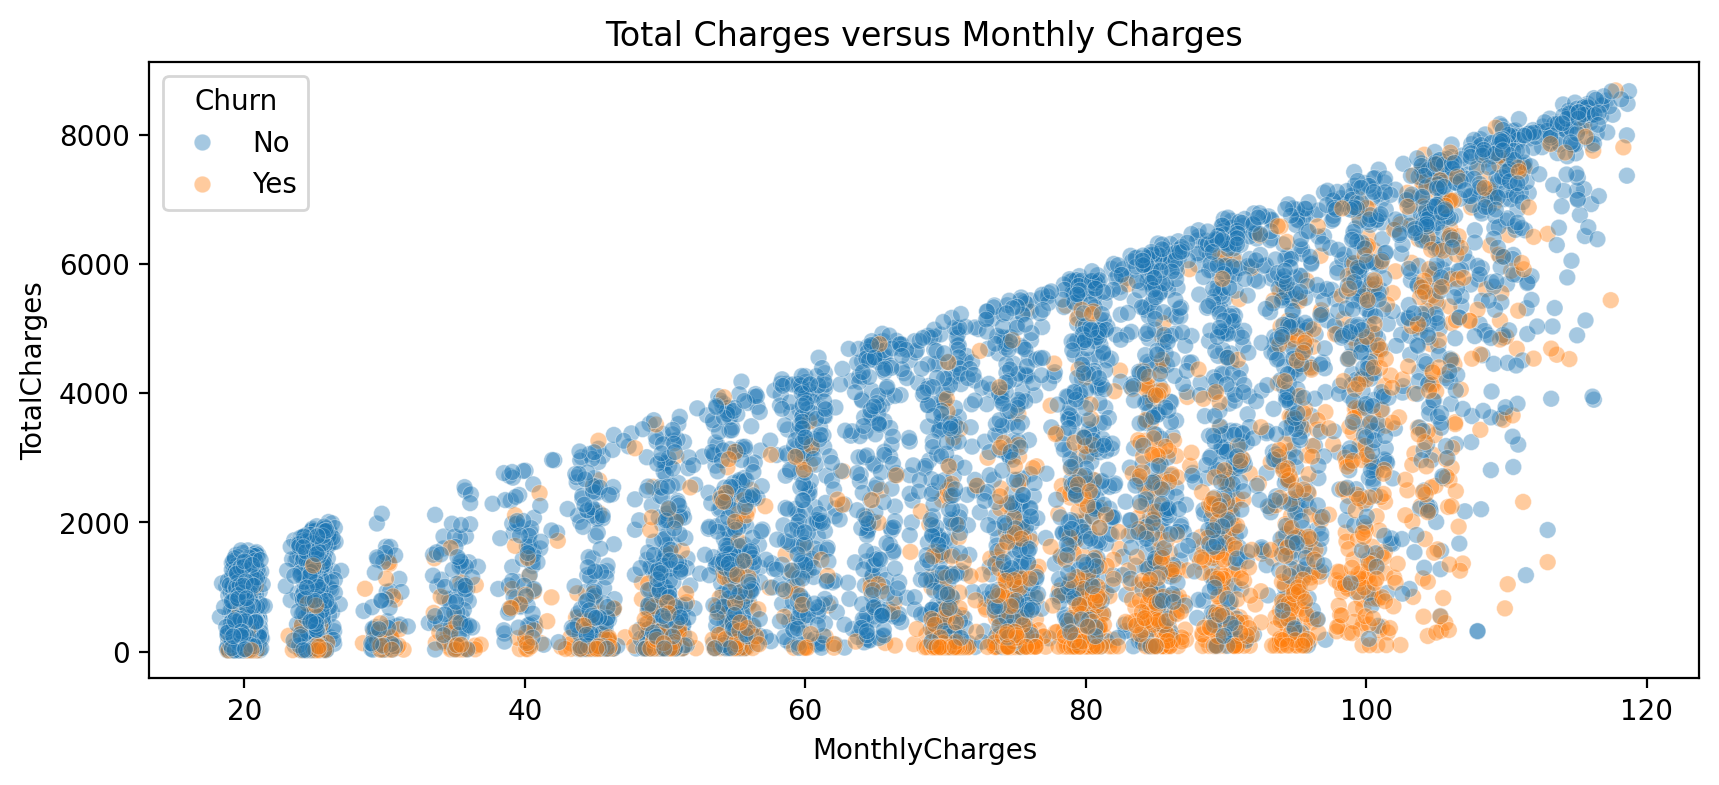

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x= 'MonthlyCharges', y='TotalCharges', hue='Churn',alpha=0.4,linewidth=0.3)
plt.title("Total Charges versus Monthly Charges")

General Overview: People churn less when they have low Monthly Charges and more when they have high monthly charges.

## Cohort Analysis

### Creating Cohorts Based on Tenure

#### Each month will be treated as a single cohort, and will calculate the Churn Rate(Percetage that had yes Churn) per cohort.

In [ ]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [ ]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


General Overview: The above cohort analysis explains that for that how many customers have churned for particular tenure. For eg: 380 people have churned for tenuremonth 1, 123 for tenure month2

In [ ]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']

In [ ]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [ ]:
churn_rate = 100*yes_churn/(no_churn+yes_churn)

In [ ]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

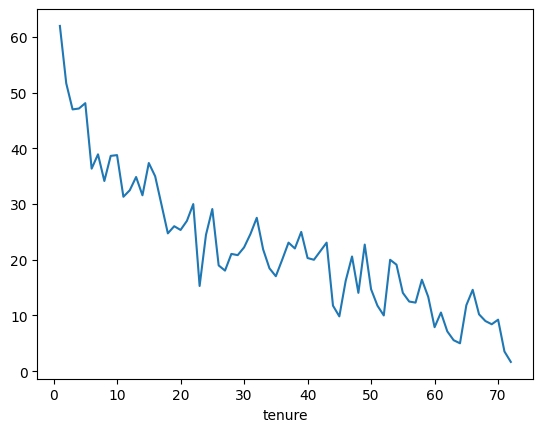

In [ ]:
churn_rate.transpose()['customerID'].plot()

Based on the tenure column values, we created a new column called Tenure Cohort that creates 4 separate categories:
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'

In [ ]:
def cohort(tenure):
    if tenure<13:
        return "0-12 Months"
    elif tenure < 25:
        return "12-24 Months"
    elif tenure < 49:
        return "24-48 Months"
    else:
        return "over 48 Months"


In [ ]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [ ]:
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


Count plot showing the churn count per cohort.

<Axes: xlabel='Tenure Cohort', ylabel='count'>

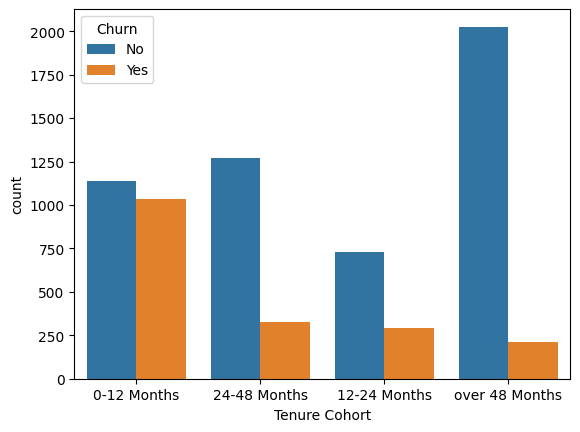

In [ ]:
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

A grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

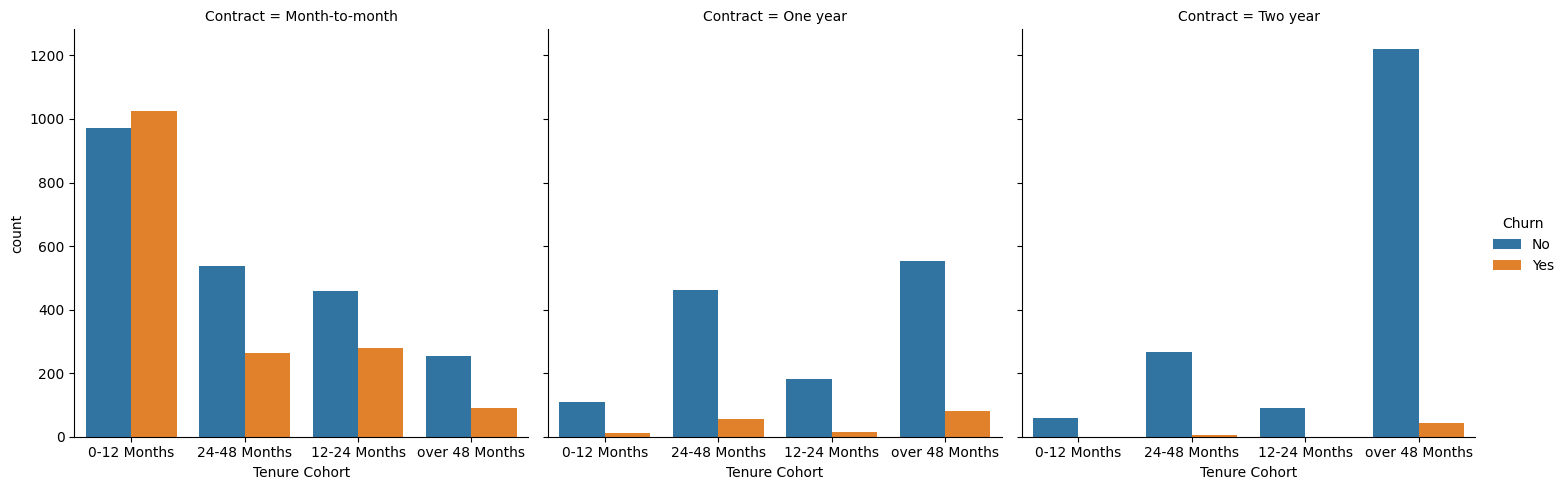

In [ ]:
sns.catplot(data=df,x='Tenure Cohort',hue='Churn', kind='count',col='Contract')

## Predictive Modeling

### 2 different tree based methods: A Single Decision Tree and  Random Forest.

#### Single Decision Tree

Separating out the data into X features and Y label. Creating Dummy Variables where necessary and dropping features which are not useful.

In [ ]:
X = df.drop(['Churn','customerID'],axis=1)

In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
y = df['Churn']

Performing a train test split, holding out 10% of the data for testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
preds = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,preds))

General Overview: As seen also in the first countplot of this project, Churn NO had more rows and thus the model is performing much better on Churn NO.

In [ ]:
Overall Accuracy of 81%

In [ ]:
plot_confusion_matrix(dt,X_test,y_test)

General Overview: Misclassifying 75 people, saying that they are not going to churn whereas they are going to churn. Similarly, it missclassified 59 people as they will churn but they did not.Whereas it correctly classified 72 people as they will churn and 498 as not.

Our Recommendation to the Company: Both are missclassifications, but they have to focus on the 75 versus the 59 people, because due to the mistake they might miss out on 75 people thinking they might not churn. And for the 72 people that have been correctly classified as they are going to churn, the company should offer some discount coupons/promotions to make them stay longer.


In [ ]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns, columns = ['Feat Imp'])

In [ ]:
imp_feats = imp_feats.sort_values('Feat Imp')

In [ ]:
imp_feats

In [ ]:
imp_feats=imp_feats[imp_feats['Feat Imp']>0]

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feat Imp')
plt.xticks(rotation=90);

General Overview: Decision Tree used Tenure as the most important feature to make its decisons, the importance of tenure was clearly seen in the above cohort and churn analysis also.But it also cleared that InterService_Fiber optic was also an important feature in determining the Churn, which we missed from our previous analysis.

Our Recommendation to the Company: Now, the company should also focus on the Fiber Optic, and see whether the people churning out are due to their geographical location not getting a fiber optic.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=6)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
preds=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,preds))

Overall Accuracy of 82%

In [ ]:
plot_confusion_matrix(rf,X_test,y_test)

The total accuracy might have increased, but the number that is important to the company that the model has not classified correctly has already increased, Our model's main goal is to reduce that number. So we tweak some settings to get a better result.


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
preds=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
Here we are able to bring down the number of missclasification from 83 to 80. The overall accuracy dipped by 3% but a increase in the recall value gave better results for that particular value.

In [ ]:
# @title Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
support = SVC(kernel='rbf',random_state=101)

In [ ]:
support.fit(X_train,y_train)

In [ ]:
preds = support.predict(X_test)

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
plot_confusion_matrix(support,X_test,y_test)

In [ ]:
# Here we are able to bring down the number of missclasification to 49. The overall accuracy came out to be 75% but a increase in the recall value gave better results for that particular value.

In [ ]:
# @title Support Vector Machine


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure Cohort       0
dtype: int64


In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()


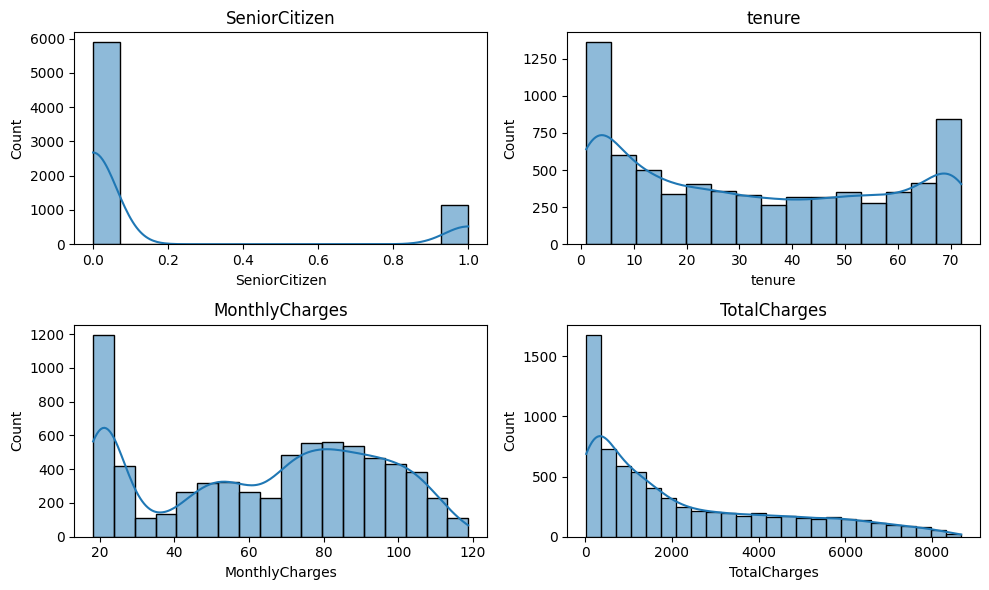

In [ ]:
# Plot histograms for numerical features
plt.figure(figsize=(10, 6))
for feature in numerical_features:
    plt.subplot(2, 2, numerical_features.index(feature) + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

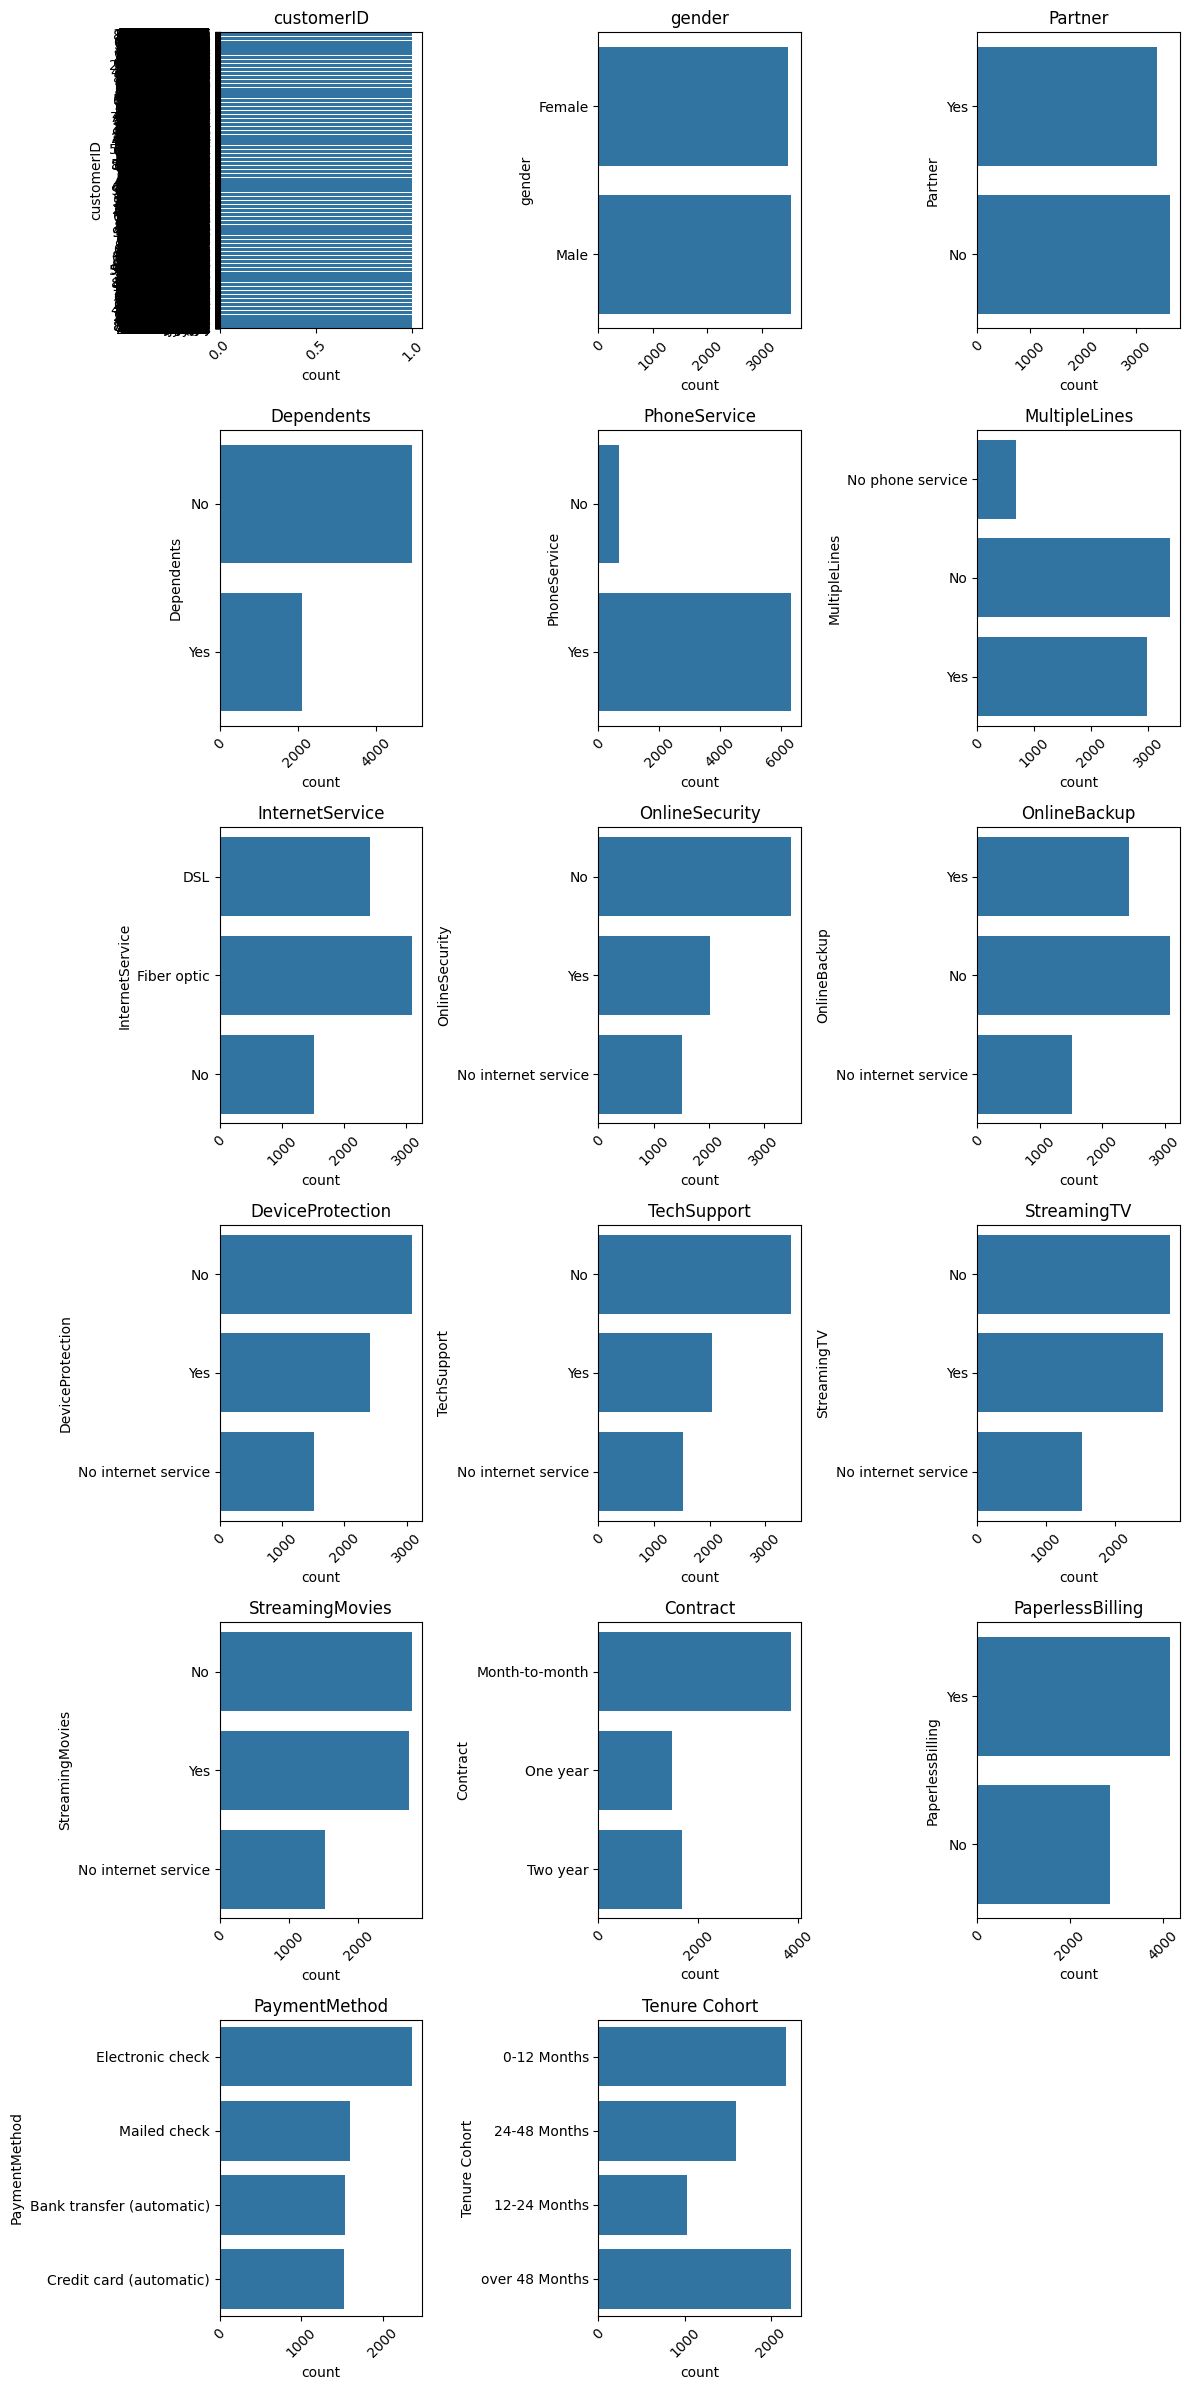

In [ ]:
# Plot count plots for categorical features
num_categorical = len(categorical_features)

# Calculate number of rows for subplots
num_rows = (num_categorical // 3) + (1 if num_categorical % 3 != 0 else 0)

plt.figure(figsize=(12, 4 * num_rows))
for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(df[feature])
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # encode categorical features
    ])

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessor.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_preprocessed, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7910447761194029

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1033
         Yes       0.67      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407


Confusion Matrix:
[[954  79]
 [215 159]]


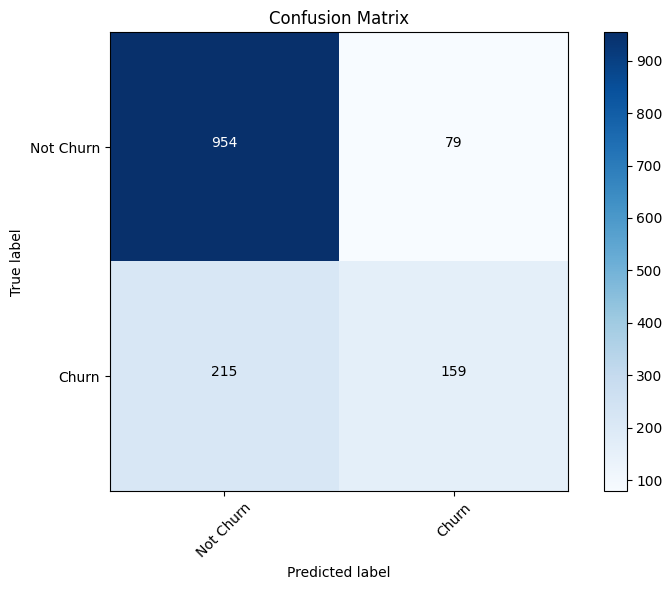


Conclusions:
Accuracy: 0.7910447761194029

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1033
         Yes       0.67      0.43      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407



In [ ]:
import numpy as np
import itertools

# Define function to plot a detailed confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot detailed confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Not Churn', 'Churn'],
                      title='Confusion Matrix')
plt.show()

# Conclusions
print("\nConclusions:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy:

The SVM model achieved an accuracy of approximately 79.32%. This indicates that the model correctly predicted the churn status for around 79.32% of the customers in the test dataset.
Classification Report:

Precision:
For customers who did not churn (class 'No'), the precision was approximately 83%, indicating that among the predicted non-churn cases, around 83% were correctly predicted.
For customers who churned (class 'Yes'), the precision was approximately 65%, indicating that among the predicted churn cases, around 65% were correctly predicted.
Recall:
For customers who did not churn (class 'No'), the recall was approximately 91%, indicating that the model correctly identified around 91% of the actual non-churn cases.
For customers who churned (class 'Yes'), the recall was approximately 47%, indicating that the model correctly identified around 47% of the actual churn cases.
F1-score:
The F1-score, which is the harmonic mean of precision and recall, was approximately 87% for class 'No' and 55% for class 'Yes'.
Support:
The support indicates the number of actual occurrences of each class in the test dataset.
Overall Conclusion:

The SVM model demonstrates reasonable performance in predicting customer churn, with an accuracy of approximately 79.32%. However, there is room for improvement, particularly in correctly identifying churn cases (class 'Yes'), where the recall is lower compared to non-churn cases (class 'No'). This suggests that the model may benefit from additional features or tuning to better capture churn behavior and improve overall predictive performance.
Actionable insights could involve exploring additional data sources, refining feature selection, or experimenting with different machine learning algorithms to enhance the model's performance and effectiveness in identifying customers at risk of churn.
These conclusions provide insights into the SVM model's performance and offer guidance for further analysis and model refinement to address churn prediction challenges effectively.

SVM might have handled class imbalances better than decision trees and random forests. Our dataset had a class imbalance, where the churn instances are much fewer than non-churn instances, SVM's margin maximization objective might have helped it focus more on correctly classifying the minority class.

SVM might have benefited from better feature engineering or feature selection techniques, which could have made it more robust to predicting churn instances.

